# 의사결정나무(Decison Tree)

- [의사결정 나무](https://scikit-learn.org/stable/modules/tree.html#)
  - 모델의 의사결정 규칙을 **나무형태**로 표현하는 모델
  - 분할된 영역에 클래스 데이터가 최대한 많이 존재하도록 각 축으로 영역을 분할하여 생성
    - 즉, 불순도 (impurity)가 작은 방향, information gain이 큰 방향으로 분기 (e.g., entropy, gini index, ...)
  - [ID3](https://tyami.github.io/machine%20learning/decision-tree-2-ID3/), [C4.5](https://tyami.github.io/machine%20learning/decision-tree-3-c4_5/), [CART](https://tyami.github.io/machine%20learning/decision-tree-4-CART/) 등의 알고리즘이 있으며, 본 강의에서는 의사결정나무를 생성하는 대표적인 알고리즘인 CART(Classification And Regression Tree)를 사용
- **장점**
  - 모델이 생성한 규칙을 이해하기 쉬우며, 축에 수직으로 분할되어 설명력이 좋다.
  - 연속형 및 범주형 변수를 모두 처리 할 수 있음.
  - 통계적 가정 불필요
- **단점**
  - 과적합이 발생하기 쉬우므로 가지치기나 앙상블 기법 도입 필요함.
  - 입력변수와 출력변수 간의 복잡한 관계에는 사용하기 어려움.


### 1. 데이터 로드 및 전처리

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib


In [31]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 경로 설정
data=pd.read_csv(URL+"data/class_balance.csv")

In [4]:
data

X1        X2        X3        X4        X5        X6        X7  \
0    0.457896  0.530189  0.276976  0.359864  0.193059  0.322190  0.706897   
1    0.607100  0.341478  0.518992  0.395300  0.042071  0.469654  0.750000   
2    0.360781  0.369653  0.341039  0.021697  0.181737  0.528684  0.491379   
3    0.460910  0.413500  0.535685  0.302794  0.242326  0.408966  0.646552   
4    0.263068  0.279821  0.535685  0.302794  0.242326  0.408966  0.646552   
..        ...       ...       ...       ...       ...       ...       ...   
249  0.360022  0.396033  0.382803  0.070771  0.143308  0.920884  0.586207   
250  0.508628  0.437628  0.192378  0.061866  0.168425  0.481919  0.715517   
251  0.275930  0.364365  0.302236  0.376615  0.485135  0.627270  0.594828   
252  0.785179  0.271804  0.400189  0.457851  0.229526  0.244320  0.396552   
253  0.164343  0.571191  0.324472  0.401357  0.249864  0.229873  0.448276   

           X8        X9       X10  ...      X466      X467      X468  \
0    0.553781  0.653894  0.375204  ...  0.246376  0.711806  0.008532   
1    0.542031  0.447466  0.189233  ...  0.523785  0.760417  0.030930   
2    0.516722  0.300371  0.376835  ...  0.185769  0.659722  0.005333   
3    0.561615  0.415328  0.313214  ...  0.246376  0.000000  1.000000   
4    0.638747  0.660074  0.520392  ...  0.110711  0.517361  0.023677   
..        ...       ...       ...  ...       ...       ...       ...   
249  0.636336  0.337454  0.432300  ...  0.000000  0.597222  0.016212   
250  0.270563  0.407911  0.336052  ...  0.132582  0.975694  0.017065   
251  0.435673  0.420272  0.367047  ...  0.246376  0.586806  0.008532   
252  0.875565  0.110012  0.337684  ...  0.221768  0.767361  0.024317   
253  0.592648  0.498146  0.340946  ...  0.214622  0.621528  0.020904   

         X469      X470      X471      X472      X473      X474  Y  
0    0.013672  0.008467  0.402240  0.238811  0.274876  0.210238 -1  
1    0.033203  0.029759  0.210356  0.309339  0.328358  0.439175 -1  
2    0.003906  0.005311  0.381877  0.208171  0.208955  0.155761 -1  
3    1.000000  1.000000  0.381877  0.208171  0.208955  0.155761 -1  
4    0.022461  0.023447  0.608414  0.212062  0.268657  0.092827 -1  
..        ...       ...       ...       ...       ...       ... ..  
249  0.013672  0.015997  0.045307  0.147860  0.171642  0.000000  1  
250  0.015625  0.016114  0.543689  0.227626  0.320896  0.111165  1  
251  0.015625  0.008613  0.343042  0.151751  0.164179  0.143012  1  
252  0.019531  0.023461  0.509709  0.398833  0.440299  0.185945  1  
253  0.018555  0.020352  0.309061  0.178988  0.201493  0.179953  1  

[254 rows x 475 columns]

In [5]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22,shuffle =True)

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

### 2. 평가 지표 함수

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

###### 이미지 출처 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [6]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1

    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))


### 3. 모델 학습 및 예측

In [28]:
from sklearn.tree import DecisionTreeClassifier

ccp_alpha_list = np.arange(0.25,0,-0.001) # 0.25부터 0까지 0.001씩 감소
train_scores =[]
test_scores =[]
for alpha in ccp_alpha_list:
    clf = DecisionTreeClassifier(ccp_alpha= alpha) #
    clf.fit(X_train,Y_train) # 학습용 데이터로 모델 학습

    preds_train = clf.predict(X_train) # 모델 예측
    preds = clf.predict(X_test)

    train_scores.append(1-accuracy_score(Y_train,preds_train)) # 학습용 데이터 오분류율
    test_scores.append(1-accuracy_score(Y_test,preds)) # 테스트 데이터 오분류율

In [24]:
# np.arange(0.25,0,-0.001)

array([0.25 , 0.249, 0.248, 0.247, 0.246, 0.245, 0.244, 0.243, 0.242,
       0.241, 0.24 , 0.239, 0.238, 0.237, 0.236, 0.235, 0.234, 0.233,
       0.232, 0.231, 0.23 , 0.229, 0.228, 0.227, 0.226, 0.225, 0.224,
       0.223, 0.222, 0.221, 0.22 , 0.219, 0.218, 0.217, 0.216, 0.215,
       0.214, 0.213, 0.212, 0.211, 0.21 , 0.209, 0.208, 0.207, 0.206,
       0.205, 0.204, 0.203, 0.202, 0.201, 0.2  , 0.199, 0.198, 0.197,
       0.196, 0.195, 0.194, 0.193, 0.192, 0.191, 0.19 , 0.189, 0.188,
       0.187, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181, 0.18 , 0.179,
       0.178, 0.177, 0.176, 0.175, 0.174, 0.173, 0.172, 0.171, 0.17 ,
       0.169, 0.168, 0.167, 0.166, 0.165, 0.164, 0.163, 0.162, 0.161,
       0.16 , 0.159, 0.158, 0.157, 0.156, 0.155, 0.154, 0.153, 0.152,
       0.151, 0.15 , 0.149, 0.148, 0.147, 0.146, 0.145, 0.144, 0.143,
       0.142, 0.141, 0.14 , 0.139, 0.138, 0.137, 0.136, 0.135, 0.134,
       0.133, 0.132, 0.131, 0.13 , 0.129, 0.128, 0.127, 0.126, 0.125,
       0.124, 0.123,

In [25]:
# np.arange(0,0.25,0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

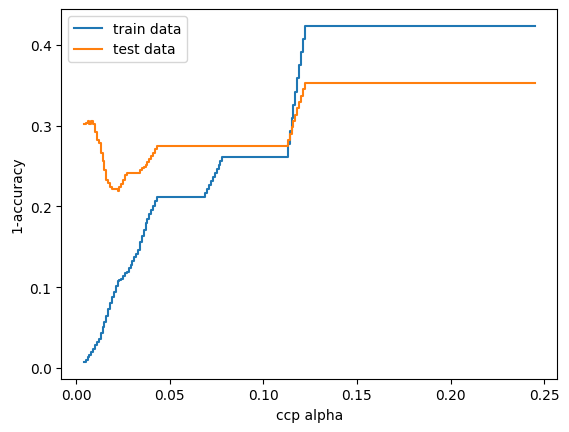

가장 좋은 test 성능을 보이는 ccp_alpha 값: 0.021999999999999797


In [40]:
# ccp-alpha 값을 변화시키면서 얻은 모델 결과 시각화

fig, ax = plt.subplots()
ax.set_xlabel("ccp alpha")
ax.set_ylabel("1-accuracy")

#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post") #train_socres 데이터 10개단위로 이동평균, 중심점은 5번째 데이터
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

# ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
# ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')
best_ccp_alpha_index = np.argmin(test_scores)
best_ccp_alpha = ccp_alpha_list[best_ccp_alpha_index]
print("가장 좋은 test 성능을 보이는 ccp_alpha 값:", best_ccp_alpha)

- 테스트 데이터에서 오분류율이 가장 낮은 alpha = 0.02를 최적값으로 선택!

In [27]:
# 최적 ccp-alpha로 모델 학습

alpha = 0.02
clf = DecisionTreeClassifier(ccp_alpha= alpha)
clf.fit(X_train,Y_train)
preds = clf.predict(X_test)
preds_train = clf.predict(X_train) # 훈련용 X 데이터셋으로 예측값 생성
print_all_reg(Y_train,preds_train) # 실제 y값과 예측값을 비교하여 성능지표 출력
print(" ")
print_all_reg(Y_test,preds)

model의 recall 값은 0.872
model의 2종 오류 확률 값은 0.128
model의 Specificity 값은 0.923
model의 1종 오류 확률 값은 0.077
model의 precision 값은 0.893
model의 f1_score 값은 0.882
model의 G-mean 값은 0.897
model의 accuracy 값은 0.901
 
model의 recall 값은 0.722
model의 2종 오류 확률 값은 0.278
model의 Specificity 값은 0.848
model의 1종 오류 확률 값은 0.152
model의 precision 값은 0.722
model의 f1_score 값은 0.722
model의 G-mean 값은 0.783
model의 accuracy 값은 0.804
